# Normal Equation

In [89]:
# Let's test this by generating some linear-looking data
import numpy as np

np.random.seed(42)
X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.randn(100, 1)


In [90]:
# Compute theta-hat with the Normal Equation

X_b = np.c_[np.ones((100, 1)), X]  # add x0 = 1 to each instance
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)
theta_best

array([[4.21509616],
       [2.77011339]])

In [91]:
# Next, let's make predictions using this theta-hat we've found
X_new = np.array([[0], [2]])
X_new_b = np.c_[np.ones((2, 1)), X_new]  # add x0 = 1 to each instance
y_predict = X_new_b.dot(theta_best)
y_predict

array([[4.21509616],
       [9.75532293]])

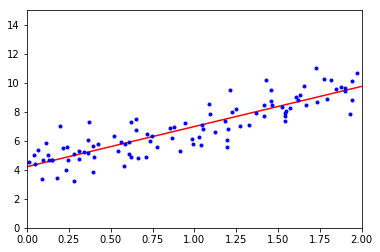

In [92]:
# Let's plot out these predictions
import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(X_new, y_predict, 'r-')
plt.plot(X, y, 'b.')
plt.axis([0, 2, 0, 15])
plt.show()

In [93]:
# And now let's repeat that process but with scikit-learn
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X, y)
lin_reg.intercept_, lin_reg.coef_

(array([4.21509616]), array([[2.77011339]]))

In [94]:
lin_reg.predict(X_new)
# This is the exact same result!

array([[4.21509616],
       [9.75532293]])

# Batch Gradient Descent

In [95]:
# Look at a quick implementation of this algorithm
eta = 0.1 #learning rate
n_iterations = 1000
m = 100

theta = np.random.randn(2, 1)  #random initialization
for iteration in range(n_iterations):
    gradients = 2 / m * X_b.T.dot(X_b.dot(theta) - y)
    theta = theta - eta * gradients
    
theta

array([[4.21509616],
       [2.77011339]])

# Stochastic Gradient Descent

In [96]:
# Implement the algorithm using a simple learning schedule
n_epochs = 50
t0, t1 = 5, 50. # learning schedule hyperparameters

def learning_schedule(t):
    return t0 / (t + t1)

theta = np.random.randn(2, 1)  # random initialization

for epoch in range(n_epochs):
    for i in range(m):
        random_index = np.random.randint(m)
        sl = slice(random_index, random_index + 1)
        xi = X_b[sl]
        yi = y[sl]
        gradients = 2 * xi.T.dot(xi.dot(theta) - yi)
        eta = learning_schedule(epoch * m + i)
        theta -= eta * gradients
        
theta

array([[4.18475289],
       [2.73036719]])

In [97]:
# Now let's do it using scikit-learn
from sklearn.linear_model import SGDRegressor
sgd_reg = SGDRegressor(n_iter = 50, penalty = None, eta0 = 0.01)
sgd_reg.fit(X, y.ravel())
sgd_reg.intercept_, sgd_reg.coef_

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)


(array([3.94964771]), array([3.00377167]))

# Polynomial Regression

In [98]:
# First, look at an example
m = 100
np.random.seed(42)
X = 6 * np.random.randn(m, 1) - 3
y = 0.5 * X**2 + X + 2 + np.random.randn(m, 1)


In [99]:
# Let's use scikit-learn to transform the data, adding the square of each feature
# in the training set as new features

from sklearn.preprocessing import PolynomialFeatures
poly_features = PolynomialFeatures(degree = 2, include_bias = False)
X_poly = poly_features.fit_transform(X)
X[0]

array([-0.01971508])

In [100]:
X_poly[0]

array([-0.01971508,  0.00038868])

In [101]:
# Now we can fit a LinearRegressor model to this extended training data
lin_reg = LinearRegression()
lin_reg.fit(X_poly, y)
lin_reg.intercept_, lin_reg.coef_


(array([1.87009469]), array([[1.01811444, 0.50512305]]))

# Learning Curves

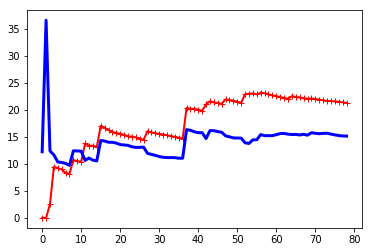

In [102]:
# This is a function that plots the learning curves of a model given some training data
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

def plot_learning_curves(model, X, y):
    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size = 0.2)
    train_errors, val_errors = [], []
    for m in range(1, len(X_train)):
        model.fit(X_train[:m], y_train[:m])
        y_train_predict = model.predict(X_train[:m])
        y_val_predict = model.predict(X_val)
        train_errors.append(mean_squared_error(y_train_predict, y_train[:m]))
        val_errors.append(mean_squared_error(y_val_predict, y_val))
    plt.plot(np.sqrt(train_errors), 'r-+', lw = 2, label = 'train')
    plt.plot(np.sqrt(val_errors), 'b-', lw = 3, label = 'val')
    
lin_reg = LinearRegression()
plot_learning_curves(lin_reg, X, y)

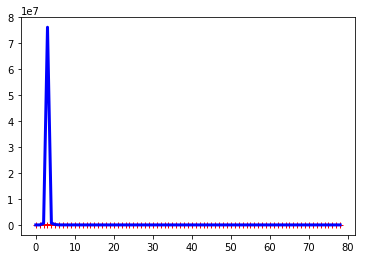

In [103]:
# Now let's look at the curves of a 10th degree polynomial on the same data
from sklearn.pipeline import Pipeline
polynomial_regression = Pipeline([
    ('poly_features', PolynomialFeatures(degree = 10, include_bias = False)),
    ('lin_reg', LinearRegression()),
])

plot_learning_curves(polynomial_regression, X, y)

# Regularized Linear Models
## Ridge Regression

In [104]:
# Perform Ridge Regression with scikit-learn using closed-form solution

from sklearn.linear_model import Ridge
ridge_reg = Ridge(alpha = 1, solver = 'cholesky')
ridge_reg.fit(X, y)
ridge_reg.predict([[1.5]])

array([[3.67075511]])

In [105]:
# Now using Stochastic Gradient Descent

sgd_reg = SGDRegressor(penalty = 'l2')
sgd_reg.fit(X, y.ravel())
sgd_reg.predict([[1.5]])

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDRegressor'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


array([2.1829509])

## Lasso Regression

In [106]:
# An example using scikit-learn

from sklearn.linear_model import Lasso
lasso_reg = Lasso(alpha = 0.1)
lasso_reg.fit(X, y)
lasso_reg.predict([[1.5]])

array([3.68274416])

## Elastic Net

In [107]:
# Short example using scikit-learn

from sklearn.linear_model import ElasticNet
elastic_net = ElasticNet(alpha = 0.1, l1_ratio = 0.5)
elastic_net.fit(X, y)
elastic_net.predict([[1.5]])

array([3.70117552])

## Early Stopping

In [108]:
# A basic implementation
"""
from sklearn.base import clone
from sklearn.preprocessing import StandardScaler
# prepare the data
poly_scaler = Pipeline([
    ('poly_features', PolynomialFeatures(degree = 90, include_bias = False)),
    ('std_scaler', StandardScaler())
])
X_train_poly_scaled = poly_scaler.fit_transform(X_train)
X_val_poly_scaled = poly_scaler.transform(X_val)

sgd_reg = SGDRegressor(n_iter = 1, warm_start = True, penalty = None,
                      learning_rate = 'constant', eta0 = 0.0005)
minimum_val_error = float('inf')
best_epoch = None
best_model = None
for epoch in range(1000):
    sgd_reg.fit(X_train_poly_scaled, y_train)  # continues where it left off
    y_val_predict = sgd_reg.predict(X_val_poly_scaled)
    val_error = mean_squared_error(y_val_predict, y_val)
    if val_error < minimum_val_error:
        minimum_val_error = val_error
        best_epoch = epoch
        best_model = clone(sgd_reg)
"""

"\nfrom sklearn.base import clone\nfrom sklearn.preprocessing import StandardScaler\n# prepare the data\npoly_scaler = Pipeline([\n    ('poly_features', PolynomialFeatures(degree = 90, include_bias = False)),\n    ('std_scaler', StandardScaler())\n])\nX_train_poly_scaled = poly_scaler.fit_transform(X_train)\nX_val_poly_scaled = poly_scaler.transform(X_val)\n\nsgd_reg = SGDRegressor(n_iter = 1, warm_start = True, penalty = None,\n                      learning_rate = 'constant', eta0 = 0.0005)\nminimum_val_error = float('inf')\nbest_epoch = None\nbest_model = None\nfor epoch in range(1000):\n    sgd_reg.fit(X_train_poly_scaled, y_train)  # continues where it left off\n    y_val_predict = sgd_reg.predict(X_val_poly_scaled)\n    val_error = mean_squared_error(y_val_predict, y_val)\n    if val_error < minimum_val_error:\n        minimum_val_error = val_error\n        best_epoch = epoch\n        best_model = clone(sgd_reg)\n"

# Logistic Regression
## Decision Boundaries

In [109]:
# Build a classifier to detect flower types based on petal width feature

from sklearn import datasets
iris = datasets.load_iris()
list(iris.keys())

['data', 'target', 'target_names', 'DESCR', 'feature_names']

In [110]:
X = iris['data'][:, 3:]  #petal width
y = (iris['target'] == 2).astype(np.int)  # 1 if Iris-Virginica else 0

In [111]:
# Now train the Logistic Regression model
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression()
log_reg.fit(X, y)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

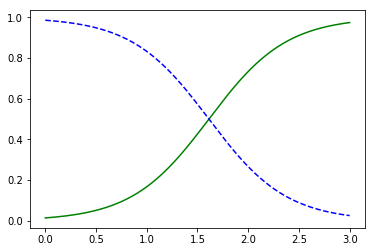

In [112]:
# Look at the model's estimated probabilities for flowers with petal widths varying from 0 to 3 cm
X_new = np.linspace(0, 3, 1000).reshape(-1, 1)
y_proba = log_reg.predict_proba(X_new)
plt.plot(X_new, y_proba[:, 1], 'g-', label = 'Iris-Virginica')
plt.plot(X_new, y_proba[:, 0], 'b--', label = 'Not Iris-Virginica')

In [113]:
log_reg.predict([[1.7], [1.5]])

array([1, 0])

## Softmax Regression

In [114]:
# Let's use Softmax Regression to classify the flowers into all three classes
X = iris['data'][:, (2,3)]   #petal length, petal width
y = iris['target']

softmax_reg = LogisticRegression(multi_class = 'multinomial', solver = 'lbfgs', C = 10)
softmax_reg.fit(X, y)
softmax_reg.predict([[5, 2]])

array([2])

In [115]:
softmax_reg.predict_proba([[5, 2]])

array([[6.33134077e-07, 5.75276067e-02, 9.42471760e-01]])

In [116]:
X

array([[1.4, 0.2],
       [1.4, 0.2],
       [1.3, 0.2],
       [1.5, 0.2],
       [1.4, 0.2],
       [1.7, 0.4],
       [1.4, 0.3],
       [1.5, 0.2],
       [1.4, 0.2],
       [1.5, 0.1],
       [1.5, 0.2],
       [1.6, 0.2],
       [1.4, 0.1],
       [1.1, 0.1],
       [1.2, 0.2],
       [1.5, 0.4],
       [1.3, 0.4],
       [1.4, 0.3],
       [1.7, 0.3],
       [1.5, 0.3],
       [1.7, 0.2],
       [1.5, 0.4],
       [1. , 0.2],
       [1.7, 0.5],
       [1.9, 0.2],
       [1.6, 0.2],
       [1.6, 0.4],
       [1.5, 0.2],
       [1.4, 0.2],
       [1.6, 0.2],
       [1.6, 0.2],
       [1.5, 0.4],
       [1.5, 0.1],
       [1.4, 0.2],
       [1.5, 0.1],
       [1.2, 0.2],
       [1.3, 0.2],
       [1.5, 0.1],
       [1.3, 0.2],
       [1.5, 0.2],
       [1.3, 0.3],
       [1.3, 0.3],
       [1.3, 0.2],
       [1.6, 0.6],
       [1.9, 0.4],
       [1.4, 0.3],
       [1.6, 0.2],
       [1.4, 0.2],
       [1.5, 0.2],
       [1.4, 0.2],
       [4.7, 1.4],
       [4.5, 1.5],
       [4.9,

# Excercise 12

In [119]:
# Load the data. Reuse the iris dataset.
X = iris['data'][:, (2, 3)]  # petal length, petal width
y = iris['target']

# Add the bias term x0 for each instance
X_with_bias = np.c_[np.ones([len(X), 1]), X]
np.random.seed(2042)


In [120]:
# Split the data into training, test, validation
test_ratio = 0.2
validation_ratio = 0.2
total_size = len(X_with_bias)

test_size = int(total_size * test_ratio)
validation_size = int(total_size * validation_ratio)
train_size = total_size - test_size - validation_size

rnd_indices = np.random.permutation(total_size)
X_train = X_with_bias[rnd_indices[:train_size]]
y_train = y[rnd_indices[:train_size]]
X_valid = X_with_bias[rnd_indices[train_size: -test_size]]
y_valid = y[rnd_indices[train_size : -test_size]]
X_test = X_with_bias[rnd_indices[-test_size:]]
y_test = y[rnd_indices[-test_size:]]



In [124]:
# We need to convert the vector of class indices to into a matrix containing a one-hot vector for each instance
def to_one_hot(y):
    n_classes = y.max() + 1
    m = len(y)
    Y_one_hot = np.zeros((m, n_classes))
    Y_one_hot[np.arange(m), y] = 1
    return Y_one_hot

In [125]:
y_train[:10]

array([0, 1, 2, 1, 1, 0, 1, 1, 1, 0])

In [126]:
to_one_hot(y_train[:10])

array([[1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [1., 0., 0.]])

In [127]:
# Now create the target class probabilities matrix
Y_train_one_hot = to_one_hot(y_train)
Y_valid_one_hot = to_one_hot(y_valid)
Y_test_one_hot = to_one_hot(y_test)

In [128]:
# Now implement the softmax function
def softmax(logits):
    exps = np.exp(logits)
    exp_sums = np.sum(exps, axis = 1, keepdims = True)
    return exps / exp_sums

In [129]:
n_inputs = X_train.shape[1]  # == 3 (2 features plus the bias term)
n_outputs = len(np.unique(y_train))  # == 3 (3 iris classes)

In [130]:
# Now for training
eta = 0.01
n_iterations = 5001
m = len(X_train)
epsilon = 1e-7
Theta = np.random.randn(n_inputs, n_outputs)

for iteration in range(n_iterations):
    logits = X_train.dot(Theta)
    Y_proba = softmax(logits)
    loss = -np.mean(np.sum(Y_train_one_hot * np.log(Y_proba + epsilon), axis = 1))
    error = Y_proba - Y_train_one_hot
    if iteration % 500 == 0:
        print(iteration, loss)
    gradients = 1/m * X_train.T.dot(error)
    Theta -= eta * gradients
    
    

0 5.446183864821945
500 0.8351003035768683
1000 0.6876961554414912
1500 0.6010299835452122
2000 0.5442782811959167
2500 0.5037262742244605
3000 0.4728357293908468
3500 0.4481872508179334
4000 0.4278347262806174
4500 0.4105891022823527
5000 0.39568032574889406


In [131]:
Theta

array([[ 3.3172417 , -0.6476445 , -2.99855999],
       [-1.16505434,  0.11283387,  0.10251113],
       [-0.72087779, -0.083875  ,  1.48587045]])

In [132]:
# Now make predictions for the validation set and check accuracy score
logits = X_valid.dot(Theta)
Y_proba = softmax(logits)
y_predict = np.argmax(Y_proba, axis = 1)

accuracy_score = np.mean(y_predict == y_valid)
accuracy_score

0.9666666666666667

In [134]:
# Let's add some l2 regularization!
eta = 0.1
n_iterations = 5001
m = len(X_train)
epsilon = 1e-7
alpha = 0.1 # regularization hyperparameter

Theta = np.random.randn(n_inputs, n_outputs)

for iteration in range(n_iterations):
    logits = X_train.dot(Theta)
    Y_proba = softmax(logits)
    xentropy_loss = -np.mean(np.sum(Y_train_one_hot * np.log(Y_proba + epsilon), axis = 1))
    l2_loss = 1/2 * np.sum(np.square(Theta[1:]))
    loss = xentropy_loss + alpha * l2_loss
    error = Y_proba - Y_train_one_hot
    if iteration % 500 == 0:
        print(iteration, loss)
    gradients = 1/m * X_train.T.dot(error) + np.r_[np.zeros([1, n_outputs]), alpha * Theta[1:]]
    Theta -= eta * gradients

0 6.629574947908294
500 0.5341631554372782
1000 0.5037712748637474
1500 0.4948056455575166
2000 0.49140819484111964
2500 0.4900085074445459
3000 0.48940742896132616
3500 0.4891431024691195
4000 0.48902516549065855
4500 0.48897205809605315
5000 0.4889480004791563


In [137]:
np.r_[np.zeros([1, n_outputs]), alpha * Theta[1:]]

array([[ 0.        ,  0.        ,  0.        ],
       [-0.10972519,  0.01249645,  0.09722875],
       [-0.04390475, -0.0134858 ,  0.05739055]])

In [138]:
np.zeros([1, n_outputs])

array([[0., 0., 0.]])

In [139]:
logits = X_valid.dot(Theta)
Y_proba = softmax(logits)
y_predict = np.argmax(Y_proba, axis = 1)

accuracy_score = np.mean(y_predict == y_valid)
accuracy_score

1.0

In [141]:
# Now add early stopping. Measure the loss on the validation set at each iteration and stop when the error starts
# growing
eta = 0.1
n_iterations = 5001
m = len(X_train)
epsilon = 1e-7
alpha = 0.1
best_loss = np.infty

Theta = np.random.randn(n_inputs, n_outputs)

for iteration in range(n_iterations):
    logits = X_train.dot(Theta)
    Y_proba = softmax(logits)
    xentropy_loss = -np.mean(np.sum(Y_train_one_hot * np.log(Y_proba + epsilon), axis=1))
    l2_loss = 1/2 * np.sum(np.square(Theta[1:]))
    loss = xentropy_loss + alpha * l2_loss
    error = Y_proba - Y_train_one_hot
    gradients = 1/m * X_train.T.dot(error) + np.r_[np.zeros([1, n_outputs]), alpha * Theta[1:]]
    Theta = Theta - eta * gradients

    logits = X_valid.dot(Theta)
    Y_proba = softmax(logits)
    xentropy_loss = -np.mean(np.sum(Y_valid_one_hot * np.log(Y_proba + epsilon), axis=1))
    l2_loss = 1/2 * np.sum(np.square(Theta[1:]))
    loss = xentropy_loss + alpha * l2_loss
    if iteration % 500 == 0:
        print(iteration, loss)
    if loss < best_loss:
        best_loss = loss
    else:
        print(iteration - 1, best_loss)
        print(iteration, loss, "early stopping!")
        break

0 4.649337964004491
500 0.5670574753130828
1000 0.5419752218749282
1500 0.5351438488442146
2000 0.5331173238286678
2500 0.5326320569939854
2700 0.5326057887011586
2701 0.5326057887197744 early stopping!


In [142]:
logits = X_valid.dot(Theta)
Y_proba = softmax(logits)
y_predict = np.argmax(Y_proba, axis = 1)

accuracy_score = np.mean(y_predict == y_valid)
accuracy_score

1.0

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/matplotlib/contour.py:967: UserWarning: The following kwargs were not used by contour: 'linewidth'
  s)


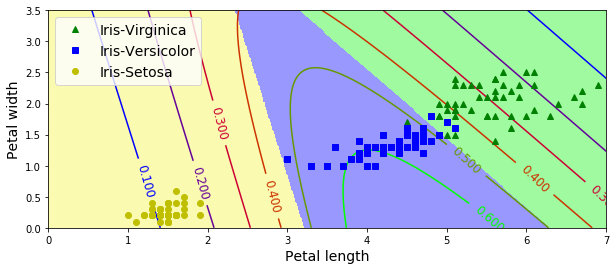

In [144]:
# Plot the model's predictions on the whole dataset
x0, x1 = np.meshgrid(
            np.linspace(0, 8, 500).reshape(-1, 1),
            np.linspace(0, 3.5, 200).reshape(-1, 1),
)

X_new = np.c_[x0.ravel(), x1.ravel()]
X_new_with_bias = np.c_[np.ones([len(X_new), 1]), X_new]

logits = X_new_with_bias.dot(Theta)
Y_proba = softmax(logits)
y_predict = np.argmax(Y_proba, axis = 1)

zz1 = Y_proba[:, 1].reshape(x0.shape)
zz = y_predict.reshape(x0.shape)

plt.figure(figsize = (10, 4))
plt.plot(X[y==2, 0], X[y==2, 1], 'g^', label = 'Iris-Virginica')
plt.plot(X[y==1, 0], X[y==1, 1], 'bs', label = 'Iris-Versicolor')
plt.plot(X[y==0, 0], X[y==0, 1], 'yo', label = 'Iris-Setosa')

from matplotlib.colors import ListedColormap
custom_cmap = ListedColormap(['#fafab0','#9898ff','#a0faa0'])

plt.contourf(x0, x1, zz, cmap=custom_cmap, linewidth=5)
contour = plt.contour(x0, x1, zz1, cmap=plt.cm.brg)
plt.clabel(contour, inline=1, fontsize=12)
plt.xlabel("Petal length", fontsize=14)
plt.ylabel("Petal width", fontsize=14)
plt.legend(loc="upper left", fontsize=14)
plt.axis([0, 7, 0, 3.5])
plt.show()





In [145]:
# Measure the final model's accuracy on the test set
logits = X_test.dot(Theta)
Y_proba = softmax(logits)
y_predict = np.argmax(Y_proba, axis = 1)

accuracy_score = np.mean(y_predict == y_test)
accuracy_score


0.9333333333333333